**Scottie YANG Miaoyi**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 4b: PCA and Image Compression

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [14,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1:  Preparing the Image

### 1A) Import and view an image

1. Import `lorikeet.png` using pyplot's [imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)
2. Print the shape of the image
3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
4. Show the pyplot


(678, 907, 4)


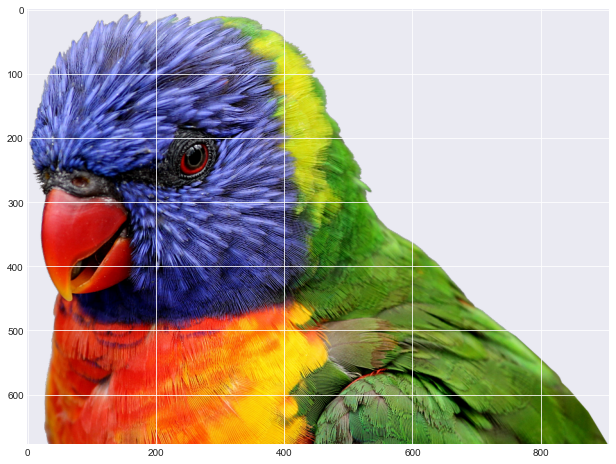

In [7]:
from sklearn.decomposition import PCA
img = plt.imread("img/lorikeet.png")
print(img.shape)
fig, ax = plt.subplots()
im = ax.imshow(img)
plt.show()

### 1B) Normalized Average

1. Reshape your image for compression
    1. Reshape your 3 dimensional `NxMxO` array to be a 2 dimensional `Nx(M*O)` array and assign it to a new variable (`color_flat`).
2. Calculate the Normalized Average
    2. Find the [Sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) of each of `color_flat`'s columns, and assign it to a new variable 
    3. Normalize the 1D array by subtracting its minimum and dividing by its range. 
    4. Your normalized average should have the shape `(M*O,)`

In [28]:
color_flat = img.reshape((678, 907*4))
sumCol = np.sum(color_flat, axis=0)
normalizedAvg = (sumCol - sumCol.min())/(sumCol.max() - sumCol.min())

## Task 2:  Compressing the Image

### Find the Image's Principle Components

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to extract the image's eigenvectors and the principle components
1. Create an instance of the PCA class with 400 components
2. Call the method `fit_transform` with `color_flat` minus the normalized average as the X parameter and saving the results into a new variable representing the Transformed values.
3. Print the shape of the Transformed values and the PCA's components.  The Transformed values should have the shape `Nx400` and the PCA's components should have the shape `400x(M*O)`
4. Create an elbow plot of the [cumulative sum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) of the [PCA's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) explained variance ratio.
    1. The x axis should be `# of Principle Components`
    1. The y axis should be `Proportional Variance Accounted for`
    1. Include a title, and x and y axis labels.

(678, 400)
(400, 3628)


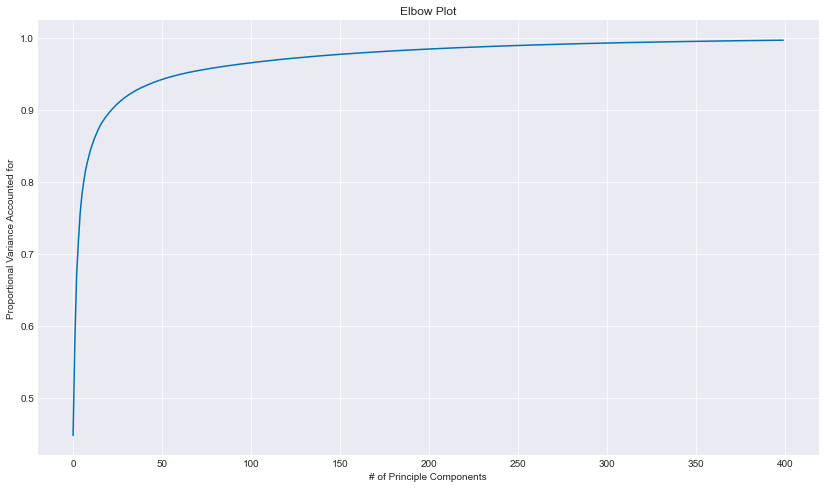

In [30]:
pca = PCA(400)
transformed = pca.fit_transform(color_flat-normalizedAvg)
print(transformed.shape)
print(pca.components_.shape)
cumulative_sums = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sums)
plt.xlabel('# of Principle Components')
plt.ylabel('Proportional Variance Accounted for')
plt.title('Elbow Plot')
plt.show()

In [31]:
np.cumsum(pca.explained_variance_ratio_[:25])

array([0.44765, 0.57958, 0.67092, 0.71793, 0.75709, 0.78274, 0.80035,
       0.81596, 0.8271 , 0.83692, 0.84605, 0.85334, 0.86019, 0.86616,
       0.87182, 0.87694, 0.88142, 0.88525, 0.8888 , 0.89207, 0.89518,
       0.8981 , 0.9009 , 0.90356, 0.9061 ], dtype=float32)

## Task 3: Reconstruct the Image 

### Reconstruct the image accounting for 90-91% percent of the proportional variance

1. Using the elbow plot, determine a number of principle components which account for 90-91% percent of the proportional variance in the image.
1. Compute the inverse transform:
    1. `transformed_values@principle_components + normalize_average`
    2. With shapes `NxZ @ Zx(M*O) + (M*O,)`
    3. With `Z` equal to the number of principle components you are keeping
3. Show the reconstructed image
    1. Use numpy's [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) method to clip any values less than 0 or greater than 1 in the reconstructed image.
    2. Reshape the reconstructed image back to the shape of the original image
    3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    4. Show the pyplot
2. Compute the compression ratio of this image
    2. Uncompressed size =  the number of floats in the original image `M*N*O`
    1. Compressed size = the number of floats required to compute the inverse transform `N*Z + Z*M*O + M*O`
    3. Compression ratio = Compressed size / Uncompressed size

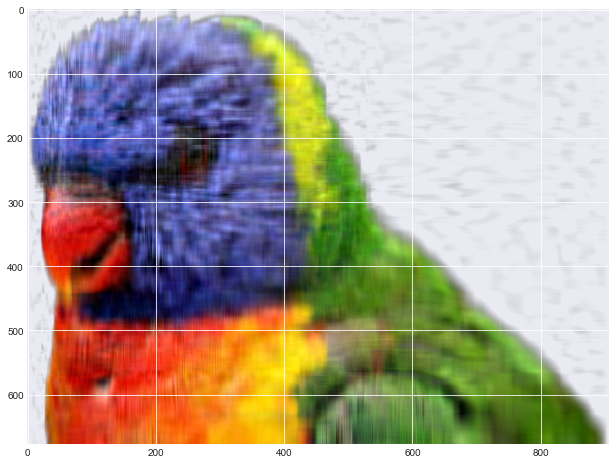

0.03788422072832411


In [33]:
# The number of principle componenets: 25
transformed_value = transformed[:,:25]
principle_components = pca.components_[:25,:]
inverse_transformed = transformed_value@principle_components+normalizedAvg
clipped_image = np.clip(inverse_transformed, 0, 1)
image = clipped_image.reshape((678, 907, 4))
plt.imshow(image)
plt.show()
uncompressed_size = 678*907*4
compressed_size = 907*25+25*678*4+678*4
compression_ratio = compressed_size/uncompressed_size
print(compression_ratio)